In [1]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from os import environ
conn = psycopg2.connect(dbname='postgres', user='postgres', host=environ['POSTGRES_1_PORT_5432_TCP_ADDR'])
cur = conn.cursor()

In [2]:
column = 'ppl_char_1'
def hist_buckets(column, table, cur):
    sql = "SELECT DISTINCT {} FROM {};".format(column,table)
    cur.execute(sql)

    labels = [str(l[0]) for l in cur.fetchall()]
    labels.sort()
    sql = "SELECT {} FROM ".format(','.join(labels).replace(' ','_'))
    sql_rows = ["(SELECT COUNT({}) FROM {} WHERE {} = '{}') as {}".format(column,table,column,label,label.replace(' ','_')) for label in labels]

    sql += ",".join(sql_rows)
    
    cur.execute(sql)
    bins = cur.fetchall()[0]
    bins = [int(bn.replace('(','').replace(')','')) for bn in bins]
    return bins, labels



In [3]:
def bar_plot(col,table,cur):
    vals,labels = hist_buckets(col,table,cur)
    x = np.arange(len(vals))
    y = np.array(vals)
    f = plt.figure(figsize=(12,3))
    ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
    sns.barplot(x=x, y=y,palette='Greens_d')
    ax.set_title("Counts for {} in {}".format(col,table))
    ax.set_xticks(x)
    ax.set_xticklabels([label.replace('type ','') for label in labels])

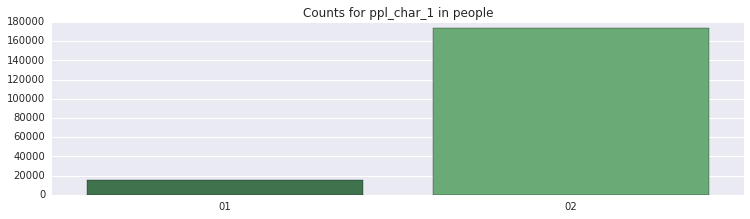

In [4]:
bar_plot('ppl_char_1','people',cur)

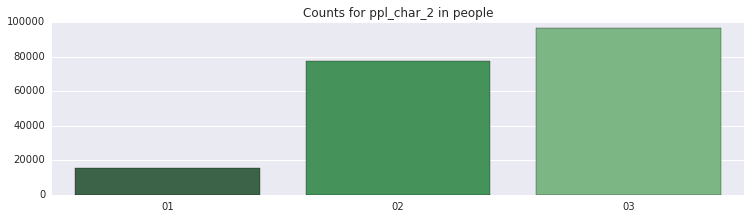

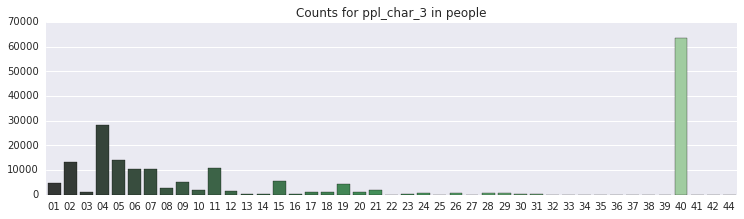

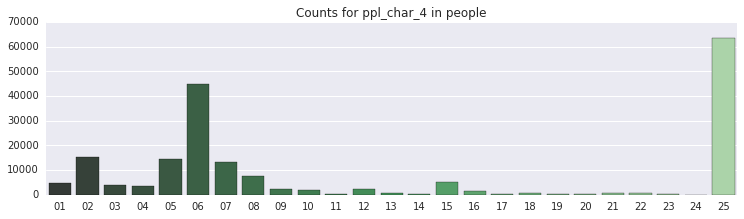

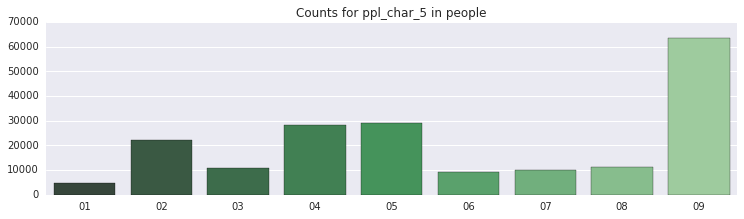

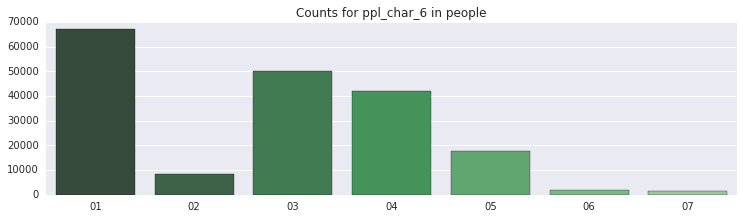

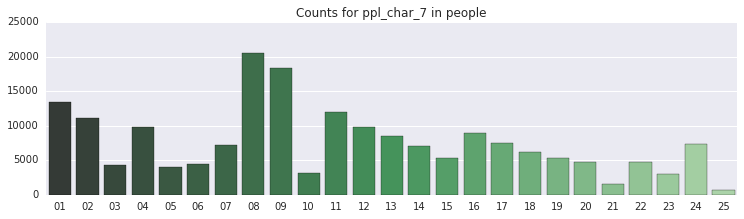

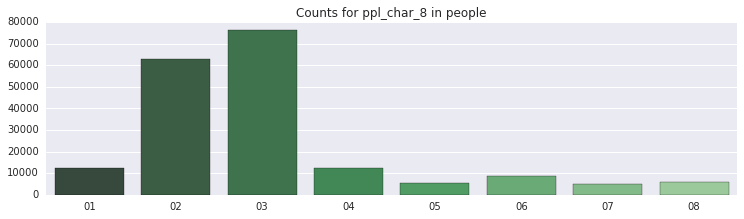

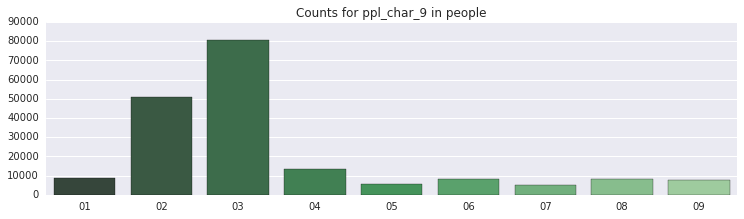

In [ ]:
bar_plot('ppl_char_2','people',cur)
bar_plot('ppl_char_3','people',cur)
bar_plot('ppl_char_4','people',cur)
bar_plot('ppl_char_5','people',cur)
bar_plot('ppl_char_6','people',cur)
bar_plot('ppl_char_7','people',cur)
bar_plot('ppl_char_8','people',cur)
bar_plot('ppl_char_9','people',cur)

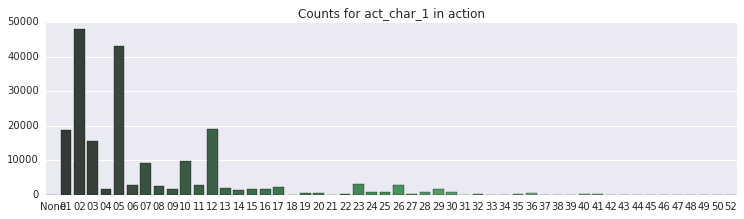

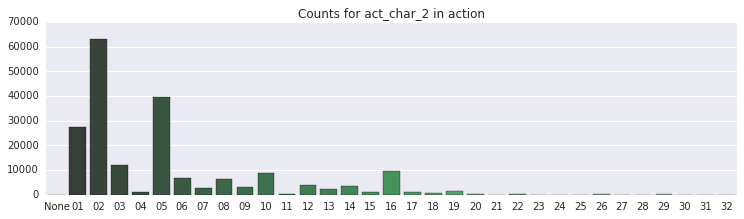

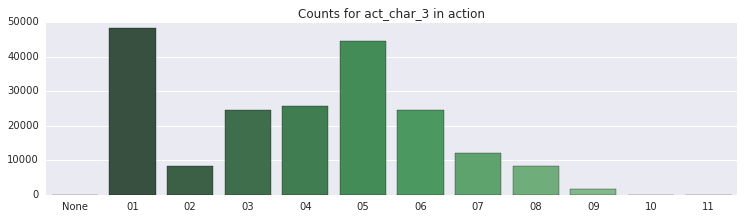

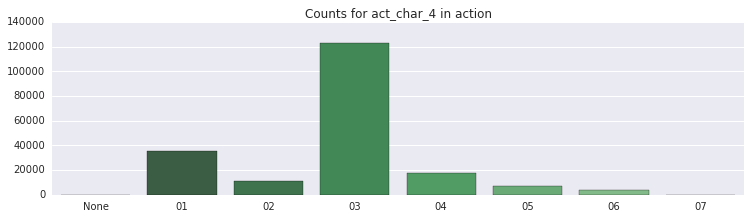

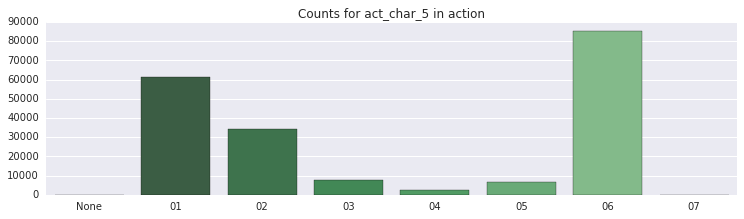

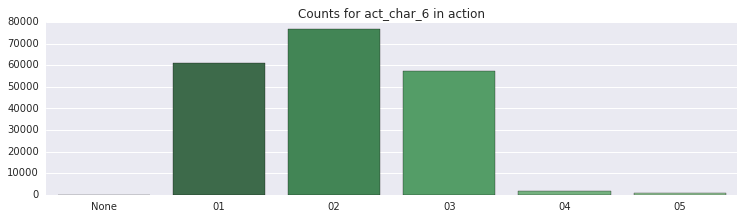

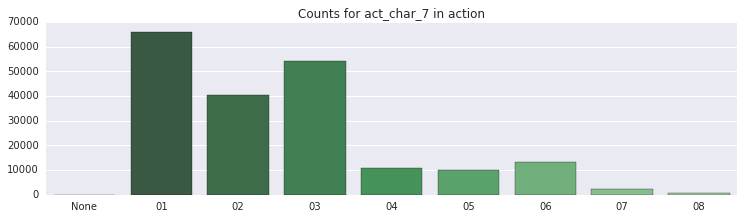

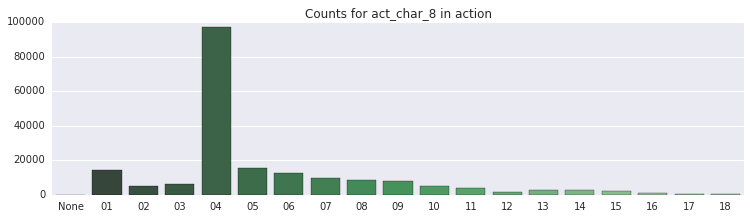

In [ ]:
bar_plot('act_char_1','action',cur)
bar_plot('act_char_2','action',cur)
bar_plot('act_char_3','action',cur)
bar_plot('act_char_4','action',cur)
bar_plot('act_char_5','action',cur)
bar_plot('act_char_6','action',cur)
bar_plot('act_char_7','action',cur)
bar_plot('act_char_8','action',cur)
bar_plot('act_char_9','action',cur)